In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4323,ham,I am not having her number sir,NaN,NaN,NaN
3592,ham,"Sorry, I'll call later",NaN,NaN,NaN
1383,ham,Please reserve ticket on saturday eve from che...,NaN,NaN,NaN
5051,ham,"Tick, tick, tick .... Where are you ? I could ...",NaN,NaN,NaN
5143,ham,Hi darlin im on helens fone im gonna b up the ...,NaN,NaN,NaN


In [7]:
df.shape # 5572 rows and 5 columns

(5572, 5)

In [8]:
# Steps that will be carried out through out the process:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Improvements if needed
# 7. Turning the model into a web app
# 8. Deployment


## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# dropping last three columns as they are not needed
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.sample(5)

,v1,v2
991,ham,Hi im having the most relaxing time ever! we h...
3270,spam,You have 1 new voicemail. Please call 08719181...
2060,ham,I did. One slice and one breadstick. Lol
1043,ham,Mmm thats better now i got a roast down me! iå...
2495,spam,WINNER! As a valued network customer you hvae ...


In [12]:
# renaming the columns for better understanding
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)

In [13]:
df.sample(5)

,Target,Text
4756,ham,"hey, looks like I was wrong and one of the kap..."
653,ham,Fine i miss you very much.
4547,ham,Hope you are having a good week. Just checking in
610,spam,22 days to kick off! For Euro2004 U will be ke...
466,ham,They don't put that stuff on the roads to keep...


In [14]:
# Using Label Encoding to convert the target variable into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['Target'] = encoder.fit_transform(df['Target']) # 0 for ham and 1 for spam

In [16]:
df.sample(5)

,Target,Text
1147,0,Ok... Help me ask if she's working tmr a not?
928,0,Oh all have to come ah?
5169,0,Now i'm going for lunch.
2832,1,You've won tkts to the EURO2004 CUP FINAL or å...
5315,0,Hahaha..use your brain dear


In [17]:
# Checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [18]:
# Checking for duplicate values
df.duplicated().sum()

403

In [19]:
# Dropping duplicate rows
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2. EDA

In [22]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

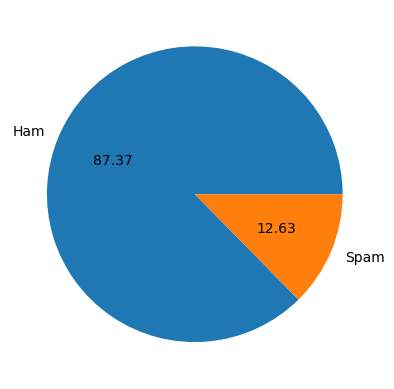

In [24]:
# Ploting the pie chart of  target variable
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()


Since from the pie chart, it is obvious that the data is imbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rafy
[nltk_data]     Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['Text'].apply(len)

In [28]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Rafy
[nltk_data]     Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham messages
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# spam messages
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
#ploting a histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

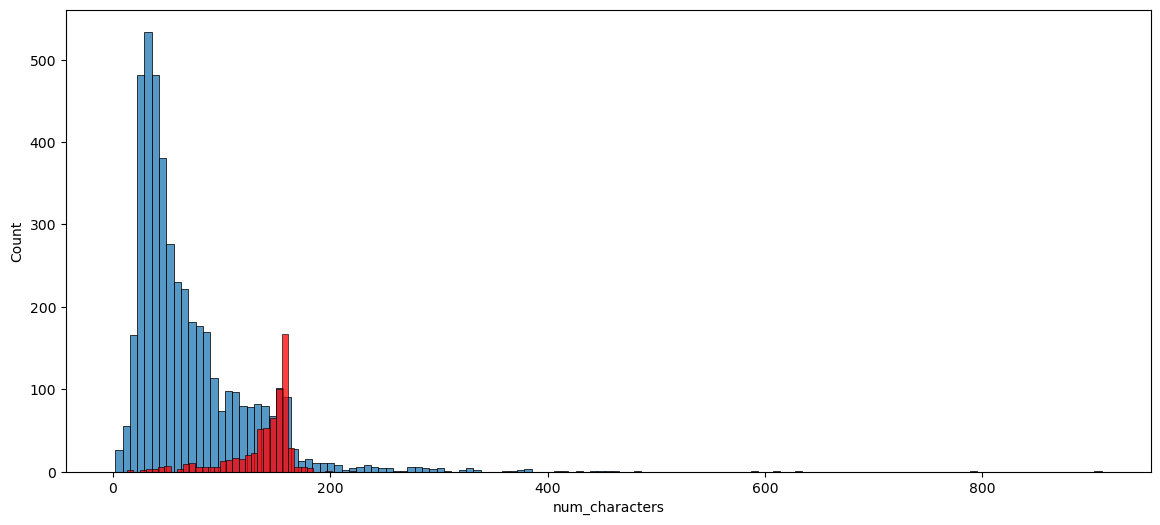

In [38]:
# histogram for number of characters in ham and spam messages
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

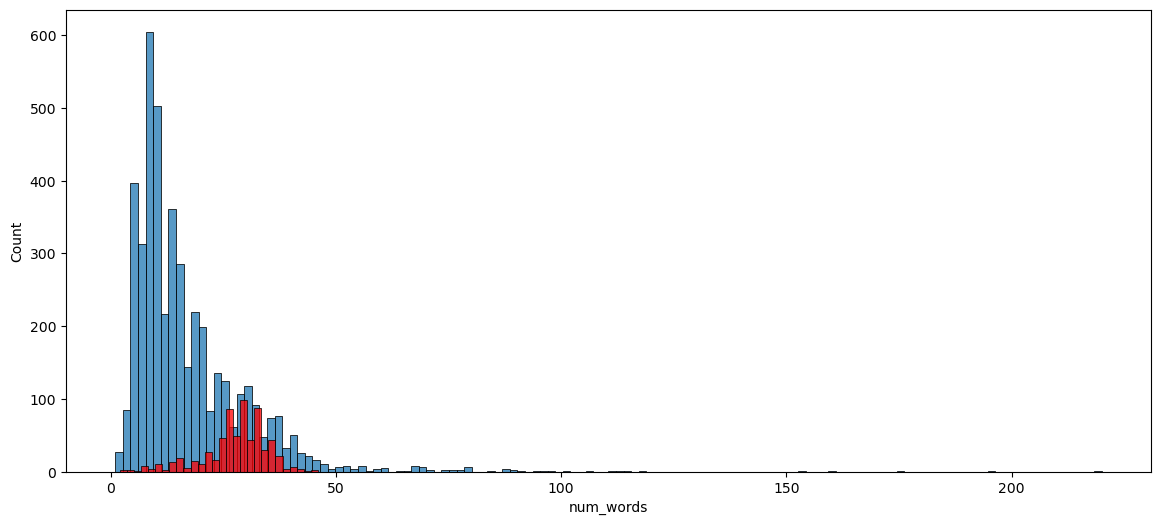

In [39]:
# histogram for number of words in ham and spam messages
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color='red')

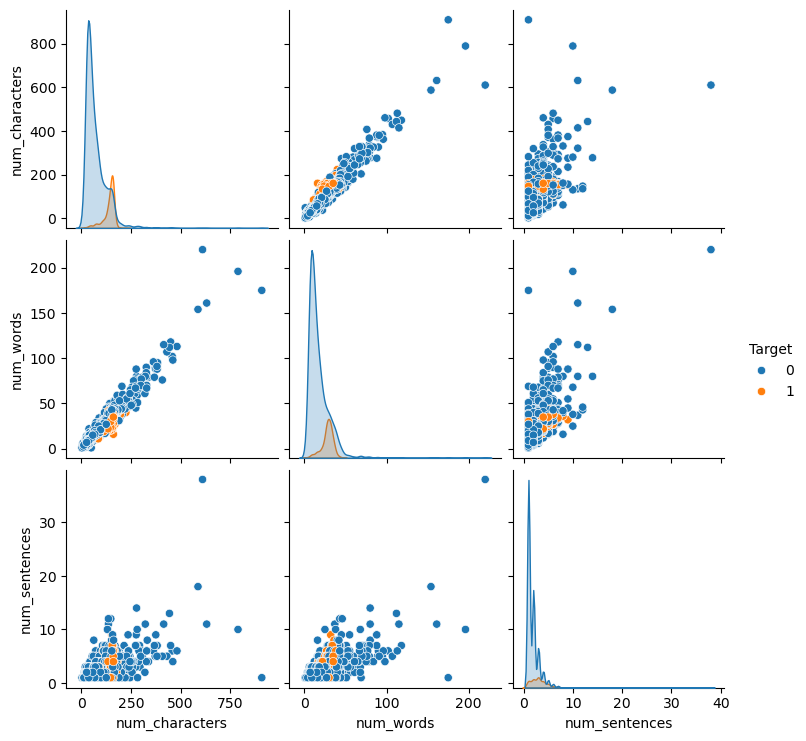

In [40]:
# Plotting a pairplot
sns.pairplot(df, hue='Target')

<Axes: >

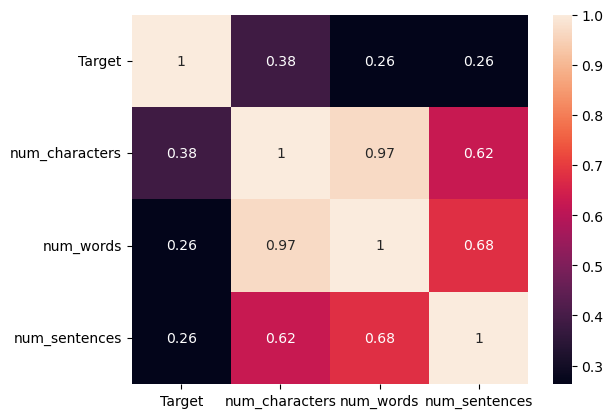

In [41]:
# checking the correlation between the numeric features
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## Step 3 : Data Preprocessing
-Lower Case

-Tokenization

-Removing special characters

-Removing stop words and punctuations

-Stemming

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rafy
[nltk_data]     Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
from nltk.corpus import stopwords
import string
string.punctuation

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text) # Tokenize the text
    y=[]
    
    # Removing non-alphanumeric characters
    for i in text: 
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
transform_text('Hello, how are you? I am fine$ and loving creature. Thank you!')

'hello fine love creatur thank'

In [46]:
transform_text('I loved the learning process of this course. It was very informative and engaging!, how about you?')

'love learn process cours inform engag'

In [47]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [50]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [51]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [61]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

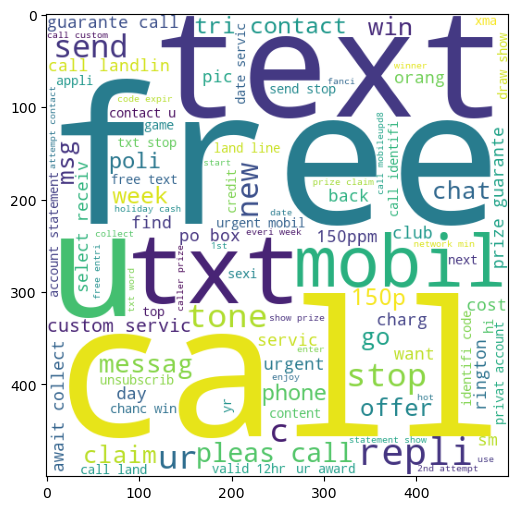

In [62]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [63]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

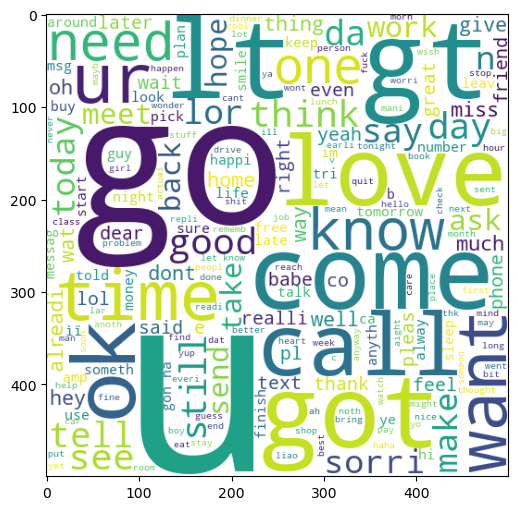

In [64]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [72]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        

In [94]:
len(spam_corpus)

0

In [97]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [98]:
len(ham_corpus)

35404

In [99]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
